#### Задание 

Датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv))

* Используя регрессию, предсказать цены на недвижимость (SalePrice)
* Построить случайный лес, вывести важность признаков
* Обучить стекинг как минимум 3х моделей: использовать хотя бы 1 линейную модель и 1 нелинейную


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
jtplot.style()

from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn import datasets, linear_model

In [69]:
data = pd.read_csv('house_prices_dz_ens/train.csv')

In [70]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
data['target'] = data.SalePrice.apply(lambda num : round(num / data.SalePrice.min()))
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,target
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,6
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,7


In [72]:
data.target.value_counts()
#data[data.SalePrice < 110900].SalePrice.value_counts(bins=10)
#data.SalePrice.min()

4     401
5     300
3     210
6     170
7     120
8      72
2      64
9      46
11     22
10     21
12     10
13      7
1       6
14      3
16      2
18      2
21      1
15      1
17      1
22      1
Name: target, dtype: int64

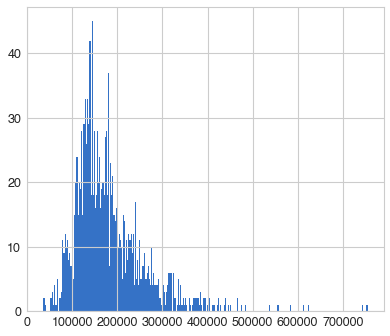

In [73]:
data.SalePrice.hist(bins=300)

* SalePrice - цена продажи объекта в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
* MSSubClass : класс здания
* MSZoning : Общая классификация зонирования
* LotFrontage : Линейные ноги улицы, соединенной с участком
* LotArea : Размер лота в квадратных футах.
* Street : Тип подъездной дороги
* Alley : Тип подъезда к аллее
* LotShape : Общая форма собственности
* LandContour : Плоскостность собственности
* Utilities : Тип имеющихся утилит
* LotConfig : Конфигурация лота
* LandSlope : склон собственности
* Neighborhood : Физические места в черте города Эймс.
* Condition 1 : Близость к главной дороге или железной дороге
* Condition 2 : Близость к главной дороге или железной дороге (если есть второй)
* BldgType : Тип жилья
* HouseStyle : Стиль жилища
* OverallQual : Общий материал и качество отделки
* OverallCond : Общая оценка состояния
* YearBuilt: Дата постройки.
* YearRemodAdd : Дата реконструкции
* RoofStyle : Тип крыши
* RoofMatl : Материал крыши
* Exterior1st : Наружное покрытие дома.
* Exterior2nd : Наружное покрытие дома (если используется более одного материала).
* MasVnrType : Тип облицовки кладки
* MasVnrArea : Площадь облицовки кладки в квадратных футах
* ExterQual : Качество наружных материалов
* ExterCond : Текущее состояние материала снаружи.
* Foundation : Тип фундамента
* BsmtQual : Высота подвала
* BsmtCond : Общее состояние подвала.
* BsmtExposure : Подвальные стены на уровне сада или выхода
* BsmtFinType1 : Качество готовой площади подвала
* BsmtFinSF1 : Готовые квадратные футы типа 1
* BsmtFinType2 : Качество второй законченной области (если есть)
* BsmtFinSF2 : Готовые квадратные ножки типа 2
* BsmtUnfSF : Незавершенные квадратные футы подвала
* TotalBsmtSF : Общая площадь подвала в квадратных футах
* Heating : Тип отопления
* HeatingQC : Качество и состояние отопления
* CentralAir : Центральное кондиционирование
* Electrical : электрическая система
* 1stFlrSF : квадратные футы на первом этаже
* 2ndFlrSF : квадратные футы второго этажа
* LowQualFinSF : квадратные футы с отделкой низкого качества (все этажи)
* GrLivArea : квадратные футы жилой площади надземного уровня
* BsmtFullBath : Полные ванные комнаты в подвале
* BsmtHalfBath : полуподвальные ванные комнаты
* FullBath : Полные ванные комнаты выше уровня
* HalfBath : Полуванны выше уровня
* Bedroom : Количество спален над цокольным этажом
* Kitchen : Количество кухонь
* KitchenQual : Качество кухни
* TotRmsAbvGrd : Общее количество комнат выше уровня (без ванных комнат)
* Functional : Рейтинг функциональности дома
* Fireplaces : Количество каминов
* FireplaceQu : качество камина
* GarageType : расположение гаража
* GarageYrBlt : Год постройки гаража
* GarageFinish : Внутренняя отделка гаража.
* GarageCars : Размер гаража по вместимости машины
* GarageArea : Размер гаража в квадратных футах.
* GarageQual : качество гаража
* GarageCond : Состояние гаража
* PavedDrive : подъездная дорога с твердым покрытием
* WoodDeckSF : Площадь деревянного настила в квадратных футах
* OpenPorchSF : Площадь открытой веранды в квадратных футах
* EnclosedPorch : Площадь крыльца в квадратных футах.
* 3SsnPorch : Площадь крыльца на три сезона в квадратных футах
* ScreenPorch : Площадь крыльца экрана в квадратных футах
* PoolArea : Площадь бассейна в квадратных футах.
* PoolQC : качество бассейна
* Fence : качество забора
* MiscFeature : прочие функции, не относящиеся к другим категориям
* MiscVal :  Значение дополнительных функций
* MoSold : месяц продажи
* YrSold : Год продажи
* SaleType : Тип продажи
* SaleCondition : Состояние продажи

In [74]:
# отделяем выборку для обучения и тестовую

data_train, data_test = train_test_split(data, test_size=0.2) 

In [75]:
y_train, y_test = data_train['SalePrice'], data_test['SalePrice']
y_train_, y_test_ = data_train['target'], data_test['target']

del data_train['SalePrice']
del data_test['SalePrice']
del data_train['target']
del data_test['target']

In [76]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[cat_feat] = data[cat_feat].fillna('nan')

#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['ID', 'SalePrice', 'target'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = data_train[cat_feat].nunique()
print(cat_nunique)


MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      14
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        6
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [77]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(data_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(data_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]


# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([data_train[num_feat].fillna(-999),
                     dummy_train], axis=1)

X_test = pd.concat([data_test[num_feat].fillna(-999),
                     dummy_test], axis=1)

In [78]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Exterior1st_Stucco,Exterior2nd_BrkFace,Condition2_Feedr,SaleCondition_Family,Electrical_FuseA,Condition1_Norm,SaleType_Oth,HouseStyle_1Story,MiscFeature_Shed,PavedDrive_Y
1237,1238,60,41.0,12393,7,5,2004,2005,0.0,0,...,0,0,0,0,0,1,0,0,0,1
252,253,60,65.0,8366,6,5,2004,2004,0.0,0,...,0,0,0,0,0,1,0,0,0,1
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,0,0,0,0,0,1,0,1,0,1
1405,1406,120,44.0,3842,8,5,2004,2005,174.0,1373,...,0,0,0,0,0,1,0,1,0,1
459,460,50,-999.0,7015,5,4,1950,1950,161.0,185,...,0,0,0,0,0,1,0,0,0,1


In [79]:
# логистическая регрессия
model_log = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model_log.fit( X_train, y_train_ )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [80]:
model_log.score(X_test, y_test_)

0.4554794520547945

In [81]:
# деревья
clf_tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=20)
clf_tree.fit( X_train, y_train_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
clf_tree.score(X_test, y_test_)

0.4691780821917808

In [83]:
# линейная регрессия
l_regr = linear_model.LinearRegression()
l_regr.fit( X_train, y_train_ )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
l_regr.score(X_test, y_test_)

0.8295326576386541

In [85]:
# случайный лес
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, y_train_)   

# беггинг
bag_clf = BaggingClassifier(n_estimators=10, base_estimator=DecisionTreeClassifier(), n_jobs=-1)
bag_clf.fit(X_train, y_train_)

clf_rf.score(X_test, y_test_), bag_clf.score(X_test, y_test_)

(0.4931506849315068, 0.5445205479452054)

In [88]:
# стекинг
classifier = StackingClassifier(
    [
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(max_depth=15, min_samples_leaf=20)),
        ('ln', RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1))
    ],
BaggingClassifier(n_estimators=10, base_estimator=DecisionTreeClassifier(), n_jobs=-1))

In [89]:
classifier.fit(X_train, y_train_)
classifier.score(X_test, y_test_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

0.4726027397260274